### Logistic Regression:
    classification problem, we are trying to predict results in a
    discrete output. In other words, we are trying to map input variables into
    discrete categories.
    
    Bank Loan Prediction

### Data Set Information:

Personal Loan Acceptance. Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. 
The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to use various models and choose the best fit that will help to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign. The file UniversalBank.csv contains data on 5000 customers. 

The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. Partition the data into training (60%) and validation (40%) sets. 




# Change Working Directory in Python

In [6]:
import os # os stand for operating system in python 
os.chdir(r'C:\Users\sajit\OneDrive\Desktop\ML\Project\Classification')
os.getcwd()

'C:\\Users\\sajit\\OneDrive\\Desktop\\ML\\Project\\Classification'

#  Importing the package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset 

In [2]:

data=pd.read_csv('Bank_loan.csv')

In [3]:
data.shape

(5000, 13)

In [4]:
data.head(10) # Checking the  first 20 obs of the dataset

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
data.tail(10) # Checking the last 20 obs of the dataset

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [6]:
#initial data description
data.describe(include='all')

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
# Checking Missing Values
data.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# Checking Duplicate Value
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [10]:
df=data.copy()

In [11]:
df.rename(columns={'Personal Loan': 'Personal_Loan', 'Securities Account' : 'Securities_Account'}, inplace=True)
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [12]:
## Drop columns which are not significant
df.drop(["ZIP Code"],axis=1,inplace=True)

In [13]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [14]:
#Numeric Varibales
dfcorr = df[["Age", "Experience", "Income", "CCAvg", "Mortgage"]]

# Categorical Variables

dfcat = df[["Family","Education","Personal_Loan","Securities_Account",
                                 "CD Account","Online","CreditCard"]]

In [15]:

#Corr Relation with Numeric Variable
dfcorr.corr()

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994215,-0.055269,-0.052012,-0.012539
Experience,0.994215,1.000000,-0.046574,-0.050077,-0.010582
Income,-0.055269,-0.046574,1.000000,0.645984,0.206806
CCAvg,-0.052012,-0.050077,0.645984,1.000000,0.109905
Mortgage,-0.012539,-0.010582,0.206806,0.109905,1.000000


<AxesSubplot:>

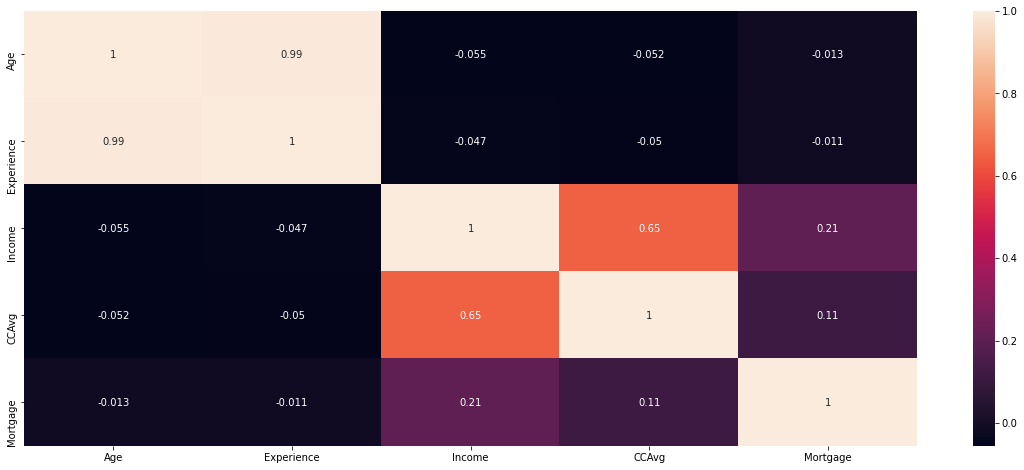

In [16]:

#Heat Map with Numeric Variable
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.heatmap(dfcorr.corr(),annot=True)

###### Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/beige because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and lighter the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

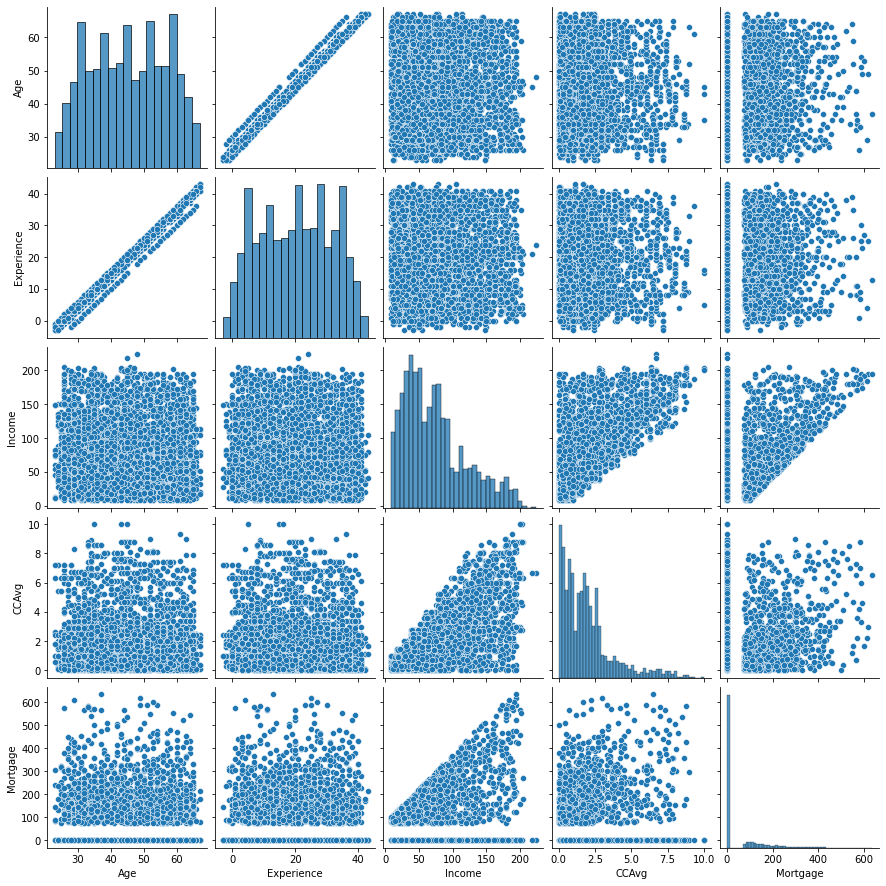

In [17]:
sns.pairplot(dfcorr);

In [18]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


###### Converting Categorical Columns using Dummies as our categorical features are nominal

In [19]:

df1 = pd.get_dummies(df,columns=["Family","Education","Securities_Account",
                                 "CD Account","Online","CreditCard"],drop_first=True,)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   CCAvg                 5000 non-null   float64
 4   Mortgage              5000 non-null   int64  
 5   Personal_Loan         5000 non-null   int64  
 6   Family_2              5000 non-null   uint8  
 7   Family_3              5000 non-null   uint8  
 8   Family_4              5000 non-null   uint8  
 9   Education_2           5000 non-null   uint8  
 10  Education_3           5000 non-null   uint8  
 11  Securities_Account_1  5000 non-null   uint8  
 12  CD Account_1          5000 non-null   uint8  
 13  Online_1              5000 non-null   uint8  
 14  CreditCard_1          5000 non-null   uint8  
dtypes: float64(1), int64(

In [21]:
#

df1.to_csv("classificationspark.csv")

### Now we begin to train the Logistic Regression model.

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case, the Personal_Loan column

In [22]:
# Extract dependent & Independent Variable

X = df1.drop("Personal_Loan",axis=1)
y = df1["Personal_Loan"]

X.head(5)


,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1


In [23]:
X.sum()

Age                     226692.00
Experience              100523.00
Income                  368871.00
CCAvg                     9689.69
Mortgage                282494.00
Family_2                  1296.00
Family_3                  1010.00
Family_4                  1222.00
Education_2               1403.00
Education_3               1501.00
Securities_Account_1       522.00
CD Account_1               302.00
Online_1                  2984.00
CreditCard_1              1470.00
dtype: float64

In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal_Loan, dtype: int64

In [25]:
y.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [26]:
per_yes = 4520/5000
per_no = 480/5000
print(per_yes*100)
print(per_no*100)

90.4
9.6


In [27]:
#Feature description
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Family_2,5000.0,0.259200,0.438239,0.0,0.0,0.0,1.0,1.0
Family_3,5000.0,0.202000,0.401532,0.0,0.0,0.0,0.0,1.0
Family_4,5000.0,0.244400,0.429774,0.0,0.0,0.0,0.0,1.0
Education_2,5000.0,0.280600,0.449337,0.0,0.0,0.0,1.0,1.0
Education_3,5000.0,0.300200,0.458391,0.0,0.0,0.0,1.0,1.0


### Splitting the data into a training set and a testing set. 

We will train our model on the training set and then use the test set to evaluate the model

### Feature Scalling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X_scaled.head()

##Feature scaling is done on X dataset

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD Account_1,Online_1,CreditCard_1
0,-1.774417,-1.666078,-0.538229,-0.193385,-0.555524,-0.591517,-0.503123,1.758310,-0.624538,-0.654965,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.096330,-0.864109,-0.250611,-0.555524,-0.591517,1.987585,-0.568728,-0.624538,-0.654965,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-0.445163,-1.363793,-0.536736,-0.555524,-0.591517,-0.503123,-0.568728,-0.624538,-0.654965,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,-0.968413,0.569765,0.436091,-0.555524,-0.591517,-0.503123,-0.568728,1.601185,-0.654965,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-1.055621,-0.625130,-0.536736,-0.555524,-0.591517,-0.503123,1.758310,1.601185,-0.654965,-0.341423,-0.25354,-1.216618,1.549632


In [30]:

#Split into training and test set for cross-validation with test_size = 0.20
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.25)
X_test.head()
#Train-Test split for X_scaled features.

## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3750, 14)
(1250, 14)
(3750,)
(1250,)


## Applying Logistic Regression Model

In [32]:
# Doing k-fold Validation Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Do k-fold cross validation using Logistic Regression
lr = LogisticRegression()
cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()

#FYI : Cross val score of scaled X features & y

0.9598

In [33]:
log_model= LogisticRegression()
#log_model.fit(X_train,y_train)

log_model.fit(X_train,y_train)

LogisticRegression()

In [34]:
log_model.intercept_

array([-5.14085581])

In [35]:
log_model.coef_

array([[-0.21302516,  0.26400325,  2.79595024,  0.42323601,  0.11600147,
        -0.11183698,  0.75375775,  0.6203601 ,  1.83981381,  1.92784034,
        -0.19502973,  0.82231346, -0.37247703, -0.37689812]])

LR Cross Validation Score of X & y: 0.9598
 
LR Cross Validation Score of X_train & y_train: 0.9586659437983129
 
LR Train Accuracy: 0.9602666666666667
 
LR Test Accuracy: 0.9592
 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1142
           1       0.88      0.61      0.72       108

    accuracy                           0.96      1250
   macro avg       0.92      0.80      0.85      1250
weighted avg       0.96      0.96      0.96      1250



array([[1133,    9],
       [  42,   66]], dtype=int64)

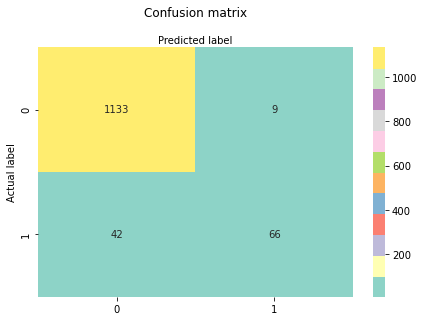

In [40]:
# Cross Validation
lr_cvb = cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()
print('LR Cross Validation Score of X & y:',lr_cvb)
print(" ")

# Cross Validation
lr_cvt = cross_val_score(log_model,X_train,y_train,cv=4).mean()

print('LR Cross Validation Score of X_train & y_train:',lr_cvt)
print(" ")
#Train Accuracy

lr_train = log_model.score(X_train,y_train)

print('LR Train Accuracy:',lr_train)
print(" ")
#Test Accuracy

lr_test = log_model.score(X_test,y_test)

print('LR Test Accuracy:',lr_test)
print(" ")

#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
y_pred = log_model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

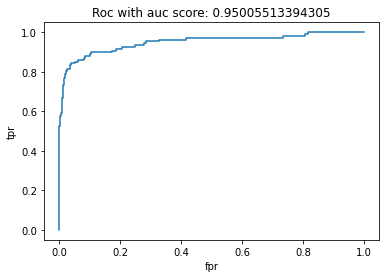

Roc with auc Score: 0.95005513394305


In [41]:
# ROC - 
# AUC - Area under the ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob= log_model.predict_proba(X_test)[:,1] 

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'. format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

lr_roc = roc_auc_score(y_test,y_pred_prob)
print('Roc with auc Score:',lr_roc)

###### Conclusion :
    
    The closer the score to 1, the better. If the score is near 0.5, it means that Logistic Regression is not a good fit 
    for the data. Either we need to get more discriminative features to help identify 
    the target class or look for other model options (may be a complex non-linear model)
    
    Our Classification Model has CV value is .96 and test accuracy of .96 which is a very good fit and can even be considered for real world modelling.


## Applying The k-nearest neighbors Classifier (KNN Classifier)

In [42]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score 

knn_log_model = KNeighborsClassifier()
knn_log_model.fit(X , y)
predicted_classes = knn_log_model.predict(X)
accuracy = accuracy_score(y,predicted_classes)

In [43]:
print('Accuracy on Regression KNN Model: ',accuracy)
print(knn_log_model)

Accuracy on Regression KNN Model:  0.9334
KNeighborsClassifier()


In [44]:
knn_log_model.fit(X_test , y_test)
predicted_classes_test = knn_log_model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes_test)
print('Accuracy on Predicted Regression KNN Model : ',accuracy)

Accuracy on Predicted Regression KNN Model :  0.9616


###### Search Grid for Hyper paramenter tuning

In [45]:
knn_classifier = KNeighborsClassifier(algorithm='brute',weights='distance')
params = {'n_neighbors':[1,11,25],'metric':["euclidean",'cityblock']}
grid = GridSearchCV(knn_classifier,param_grid=params,scoring='accuracy',cv=10)

In [46]:
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9581333333333333
{'metric': 'euclidean', 'n_neighbors': 1}


In [47]:
best_knn = grid.best_estimator_
pred_train = best_knn.predict(X_train) 
pred_test = best_knn.predict(X_test)

Cross Validation Score of X & y: 0.8946000000000001
 
Cross Validation Score of X_train & y_train: 0.9522645197552412
 
train Accuracy: 1.0
 
test Accuracy: 0.9672
 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1142
           1       0.86      0.74      0.80       108

    accuracy                           0.97      1250
   macro avg       0.92      0.86      0.89      1250
weighted avg       0.97      0.97      0.97      1250



array([[1129,   13],
       [  28,   80]], dtype=int64)

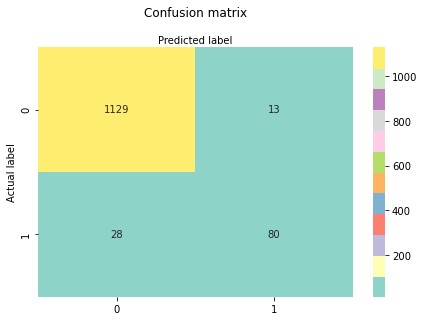

In [48]:
# Cross Validation
knn_cvb = cross_val_score(best_knn,X,y,cv=4).mean()
print('Cross Validation Score of X & y:',knn_cvb)
print(" ")

# Cross Validation
knn_cvt = cross_val_score(best_knn,X_train,y_train,cv=4).mean()

print('Cross Validation Score of X_train & y_train:',knn_cvt)
print(" ")


#Train Accuracy

knn_train = best_knn.score(X_train,y_train)

print('train Accuracy:',knn_train)
print(" ")
#Test Accuracy

knn_test = best_knn.score(X_test,y_test)

print('test Accuracy:',knn_test)
print(" ")

#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
y_pred = best_knn.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

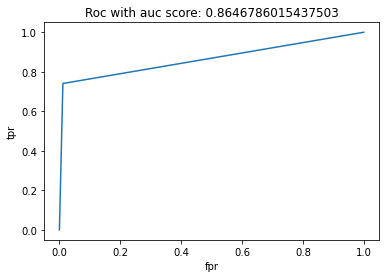

Roc with auc Score: 0.8646786015437503


In [49]:
# ROC - 
# AUC - Area under the ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob= best_knn.predict_proba(X_test)[:,1] 

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'. format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

knn_roc = roc_auc_score(y_test,y_pred_prob)
print('Roc with auc Score:',knn_roc)

    ###### Conclusion :
    
    Our KNN Model analysis value has CV score of .89 and test accuracy score of .97 which is a good fit 
    and can even be considered for real world modelling.

## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
print(rfc)

RandomForestClassifier()


In [51]:
rfc.fit(X_train,y_train)
## Predict
rfc_train_predictions = rfc.predict(X_train)
rfc_test_predictions = rfc.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score
print('Train Data Accuracy on Random Forest Model: ',accuracy_score(y_train,rfc_train_predictions))
      
### Test data accuracy
print('Test Data Accuracy on Random Forest Model: ',accuracy_score(y_test,rfc_test_predictions))

Train Data Accuracy on Random Forest Model:  1.0
Test Data Accuracy on Random Forest Model:  0.9856


###### Search Grid for Hyper paramenter tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced_subsample')
 
# Use a grid over parameters of interest
## n_estimators is the number of trees in the forest
## max_depth is how deep each tree can be
## min_sample_leaf is the minimum samples required in each leaf node for the root node to split
## "A node will only be split if in each of it's leaf nodes there should be min_sample_leaf"
 
param_grid = {"n_estimators" : [10, 25, 50, 75, 100],
           "max_depth" : [10, 12, 14, 16, 18, 20],
           "min_samples_leaf" : [5, 10, 15, 20]}
 
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)
rfc_cv_grid.fit(X_train, y_train)
rfc_cv_grid.best_estimator_
best_rfc = rfc_cv_grid.best_estimator_
best_rfc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=12,
                       max_features='sqrt', min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1)

In [53]:
## Predict
rfc2_train_predictions = best_rfc.predict(X_train)
rfc2_test_predictions = best_rfc.predict(X_test)

print('Predicted Random Forest: ',accuracy_score(y_train,rfc2_train_predictions))
      
### Test data accuracy
print('Test Data Accuracy: ',accuracy_score(y_test,rfc2_test_predictions))

Predicted Random Forest:  0.9888
Test Data Accuracy:  0.9816


Cross Validation Score of X & y: 0.9773999999999999
 
Cross Validation Score of X_train & y_train: 0.9767987134005229
 
train Accuracy: 0.9888
 
test Accuracy: 0.9816
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1142
           1       0.86      0.94      0.90       108

    accuracy                           0.98      1250
   macro avg       0.93      0.96      0.94      1250
weighted avg       0.98      0.98      0.98      1250



array([[1126,   16],
       [   7,  101]], dtype=int64)

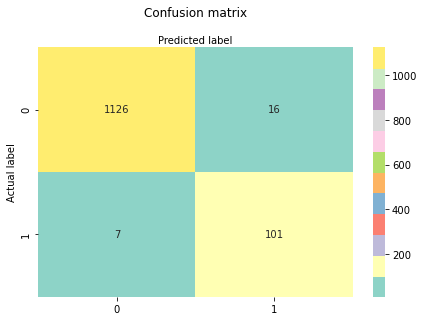

In [54]:
# Cross Validation
best_rfcvb = cross_val_score(best_rfc,X,y,cv=4).mean()
print('Cross Validation Score of X & y:',best_rfcvb)
print(" ")

# Cross Validation
best_rfcvt = cross_val_score(best_rfc,X_train,y_train,cv=4).mean()

print('Cross Validation Score of X_train & y_train:',best_rfcvt)
print(" ")

#Train Accuracy

rfc_train =best_rfc.score(X_train,y_train)

print('train Accuracy:',rfc_train)
print(" ")
#Test Accuracy

rfc_test = best_rfc.score(X_test,y_test)

print('test Accuracy:',rfc_test)
print(" ")

#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
y_pred = best_rfc.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

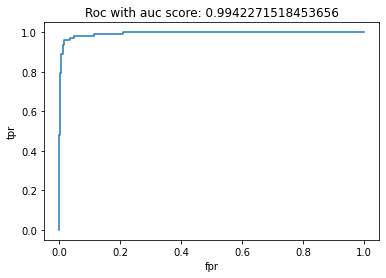

Roc with auc Score: 0.9942271518453656


In [55]:
# ROC - 
# AUC - Area under the ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob= best_rfc.predict_proba(X_test)[:,1] 

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'. format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

rfc_roc = roc_auc_score(y_test,y_pred_prob)
print('Roc with auc Score:',rfc_roc)

###### Conclusion :
    
        Our Random Forest Model analysis value has CV score .977 and test accuracy score of 0.98 which is a very good fit and can even be considered for real world  modelling.

## AdaBoost Classifier

In [56]:
# import modules as necessary
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb_log_model = AdaBoostClassifier()

In [57]:
# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators = 600,
    learning_rate = 1)

In [58]:
# Train model
adb_log_model.fit(X_train, y_train)

AdaBoostClassifier()

In [59]:
# Predict on Train 
train_preds = adb_log_model.predict(X_train)
# Predict on Test 
test_preds = adb_log_model.predict(X_test)

In [60]:
print('Predicted Adaboost Train Model: ',accuracy_score(y_train, train_preds))
print('Predicted Adaboost Test Model: ',accuracy_score(y_test, test_preds))

Predicted Adaboost Train Model:  0.9749333333333333
Predicted Adaboost Test Model:  0.9688


###### Search Grid for Hyper paramenter tuning

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [62]:
# Train model
Adaboost_model_clf.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.9],
                         'n_estimators': [100, 150, 200]})

In [64]:
# Find best model
best_adb = Adaboost_model_clf.best_estimator_
print ('Adb Best Score:',Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_) 

Adb Best Score: 0.9858666666666667 {'learning_rate': 0.5, 'n_estimators': 200}


Cross Validation Score of X & y: 0.9830000000000001
 
Cross Validation Score of X_train & y_train: 0.9837354620403091
 
train Accuracy: 1.0
 
test Accuracy: 0.988
 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1142
           1       0.97      0.89      0.93       108

    accuracy                           0.99      1250
   macro avg       0.98      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



array([[1139,    3],
       [  12,   96]], dtype=int64)

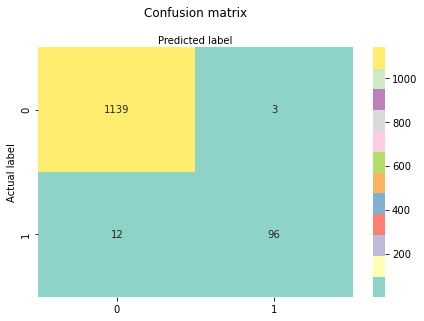

In [65]:
# Cross Validation
best_adbcv1 = cross_val_score(best_adb,X,y,cv=4).mean()
print('Cross Validation Score of X & y:',best_adbcv1)
print(" ")

# Cross Validation
best_adbcvt = cross_val_score(best_adb,X_train,y_train,cv=4).mean()

print('Cross Validation Score of X_train & y_train:',best_adbcvt)
print(" ")

#Train Accuracy

adb_train =best_adb.score(X_train,y_train)

print('train Accuracy:',adb_train)
print(" ")
#Test Accuracy

adb_test = best_adb.score(X_test,y_test)

print('test Accuracy:',adb_test)
print(" ")

#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
y_pred = best_adb.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

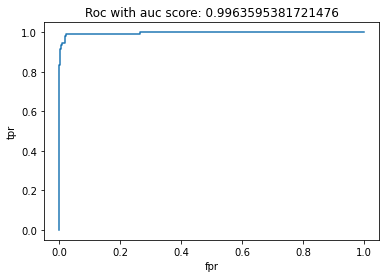

Roc with auc Score: 0.9963595381721476


In [66]:
# ROC - 
# AUC - Area under the ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob= best_adb.predict_proba(X_test)[:,1] 

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'. format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

adb_roc = roc_auc_score(y_test,y_pred_prob)
print('Roc with auc Score:',adb_roc)

###### Conclusion :
    
    Our Adaboost Model analysis value has CV score .98 and test accuracy score of 0.988 which is a very good fit and can even be considered for real world modelling.

## Support Vector Machine (SVM)

In [67]:
from sklearn.svm import SVC

## Create an SVC object and print it to see the default arguments
svc = SVC()
print(svc)

SVC()


In [68]:
## Fit
svc.fit(X_train,y_train)

## Predict
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)

### Test data accuracy
print('SVC Test data accuracy: ',accuracy_score(y_test,test_predictions))

### Train data accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,train_predictions)

print('SVC Train data accuracy: ',accuracy_score(y_train,train_predictions))

SVC Test data accuracy:  0.9824
SVC Train data accuracy:  0.9856


###### Search Grid for Hyper paramenter tuning

In [69]:
# Search Grid for Hyper paramenter tuning

from sklearn.model_selection import GridSearchCV

svc_grid = SVC(probability=True)
 

param_grid = {

'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear','rbf']}

 
svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 10)

In [70]:
svc_cv_grid.fit(X = X_train, y = y_train)
print(svc_cv_grid.best_score_,svc_cv_grid.best_params_)

0.9792 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [71]:
best_svc = svc_cv_grid.best_estimator_
pred_train = best_svc.predict(X_train) 
pred_test = best_svc.predict(X_test)

Cross Validation Score of X & y: 0.9234
 
Cross Validation Score of X_train & y_train: 0.9786660917094662
 
train Accuracy: 0.9826666666666667
 
test Accuracy: 0.9792
 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1142
           1       0.99      0.77      0.86       108

    accuracy                           0.98      1250
   macro avg       0.98      0.88      0.93      1250
weighted avg       0.98      0.98      0.98      1250



array([[1141,    1],
       [  25,   83]], dtype=int64)

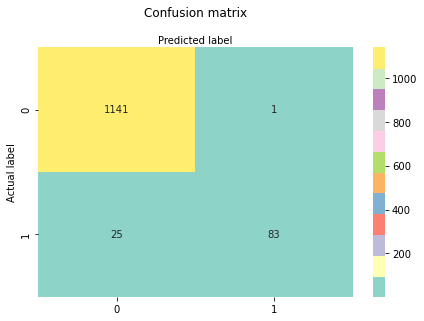

In [72]:
# Cross Validation
best_svccv1 = cross_val_score(best_svc,X,y,cv=4).mean()
print('Cross Validation Score of X & y:',best_svccv1)
print(" ")

# Cross Validation
best_svccvt = cross_val_score(best_svc,X_train,y_train,cv=4).mean()

print('Cross Validation Score of X_train & y_train:',best_svccvt)
print(" ")

#Train Accuracy

svc_train =best_svc.score(X_train,y_train)

print('train Accuracy:',svc_train)
print(" ")
#Test Accuracy

svc_test = best_svc.score(X_test,y_test)

print('test Accuracy:',svc_test)
print(" ")

#Classification Report & Confusion Matrix
from sklearn.metrics import classification_report
y_pred = best_svc.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Set3" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

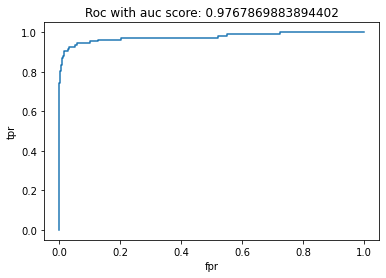

Roc with auc Score: 0.9767869883894402


In [73]:
# ROC - 
# AUC - Area under the ROC Curve

from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob= best_svc.predict_proba(X_test)[:,1] 

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'. format(roc_auc_score(y_test,y_pred_prob)))
plt.show()
svc_roc = roc_auc_score(y_test,y_pred_prob)
print('Roc with auc Score:',svc_roc)

###### Conclusion :
    
    Our SVM Model analysis value has CV score .92 and test accuracy score of 0.98 which is very good fit and can even be considered for real world modelling.

In [77]:
models = [('Llogistics Regression', lr_cvb,lr_cvt,lr_train,lr_test,lr_roc),
          ('k-nearest neighbors (KNN)',knn_cvb,knn_cvt,knn_train,knn_test,knn_roc),
          ('Support Vector Machine',best_svccv1,best_svccvt,svc_train,svc_test,svc_roc),
          ('Random Forest Classifier',best_rfcvb,best_rfcvt,rfc_train,rfc_test,rfc_roc),
          ('Adaboost Cassifier',best_adbcv1,best_adbcvt,adb_train,adb_test,adb_roc)
         ]

In [78]:

predict = pd.DataFrame(data = models, columns=['Model','CV of X & y','CV X_train & y_train','Train Accuracy','Test Accuracy', 'ROC with AUC'])
predict

,Model,CV of X & y,CV X_train & y_train,Train Accuracy,Test Accuracy,ROC with AUC
0,Llogistics Regression,0.9598,0.958666,0.960267,0.9592,0.950055
1,k-nearest neighbors (KNN),0.8946,0.952265,1.000000,0.9672,0.864679
2,Support Vector Machine,0.9234,0.978666,0.982667,0.9792,0.976787
3,Random Forest Classifier,0.9774,0.976799,0.988800,0.9816,0.994227
4,Adaboost Cassifier,0.9830,0.983735,1.000000,0.9880,0.996360


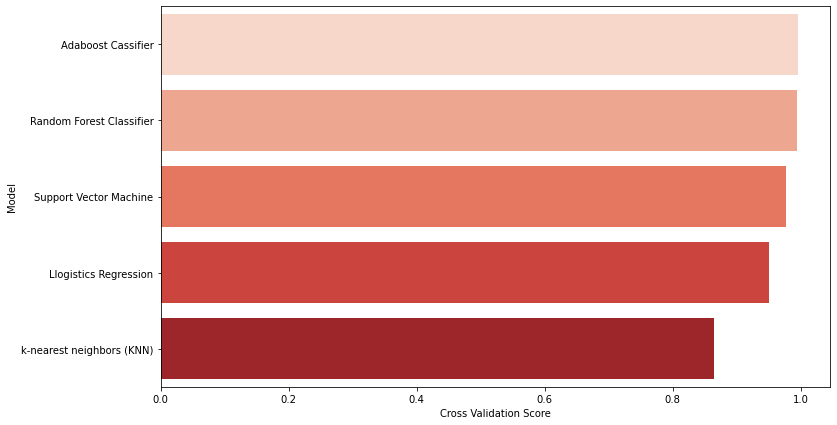

In [79]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['ROC with AUC'], ascending=False, inplace=True)

sns.barplot(x='ROC with AUC', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()



#######SUMMARY

We see that all the models gives us very good score indicating that they are good fit for our dataset.

On comparing different models, we see that Adaboost Classifier is the best fit with highest CV scores, 
accuracy as well as ROC with AUC score.